In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn

In [56]:
import seaborn as sns

In [46]:
df0 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df0.shape

(1470, 35)

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
object_columns = df0.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 51.8+ KB
None


In [16]:
column_list = df0.columns.tolist()
print(column_list)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Age	Attrition	BusinessTravel	DailyRate	Department	DistanceFromHome	Education	EducationField	EmployeeCount
EmployeeNumber	EnvironmentSatisfaction	Gender	HourlyRate	JobInvolvement	JobLevel	JobRole	JobSatisfaction	MaritalStatus
MonthlyIncome	MonthlyRate	NumCompaniesWorked	Over18	OverTime	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction
StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	YearsInCurrentRole
YearsSinceLastPromotion	YearsWithCurrManager

In [17]:
df0.duplicated().sum()

0

In [52]:
has_null = df0.isnull().values.any()

print(has_null)

False


In [19]:
df0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
##NUMBER OF DISTINCT VALUES FOR EACH COLUMN
for column in df0.columns:
    num_distinct_values = len(df0[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Age: 43 distinct values
Attrition: 2 distinct values
BusinessTravel: 3 distinct values
DailyRate: 886 distinct values
Department: 3 distinct values
DistanceFromHome: 29 distinct values
Education: 5 distinct values
EducationField: 6 distinct values
EmployeeCount: 1 distinct values
EmployeeNumber: 1470 distinct values
EnvironmentSatisfaction: 4 distinct values
Gender: 2 distinct values
HourlyRate: 71 distinct values
JobInvolvement: 4 distinct values
JobLevel: 5 distinct values
JobRole: 9 distinct values
JobSatisfaction: 4 distinct values
MaritalStatus: 3 distinct values
MonthlyIncome: 1349 distinct values
MonthlyRate: 1427 distinct values
NumCompaniesWorked: 10 distinct values
Over18: 1 distinct values
OverTime: 2 distinct values
PercentSalaryHike: 15 distinct values
PerformanceRating: 2 distinct values
RelationshipSatisfaction: 4 distinct values
StandardHours: 1 distinct values
StockOptionLevel: 4 distinct values
TotalWorkingYears: 40 distinct values
TrainingTimesLastYear: 7 distinct va

In [59]:
count_att_yes = df0[(df0['Attrition'] == 'Yes')]
print(count_att_yes)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0    

                                                 PERSONAL DEMOGRAPHIC

In [60]:
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df0)
plt.title('DistanceFromHom vs Attrition')
plt.show()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


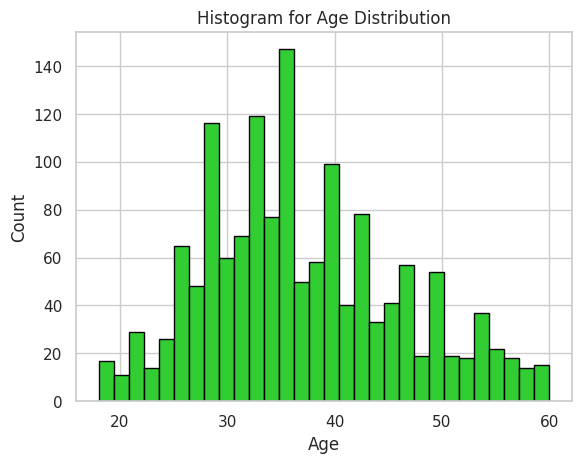

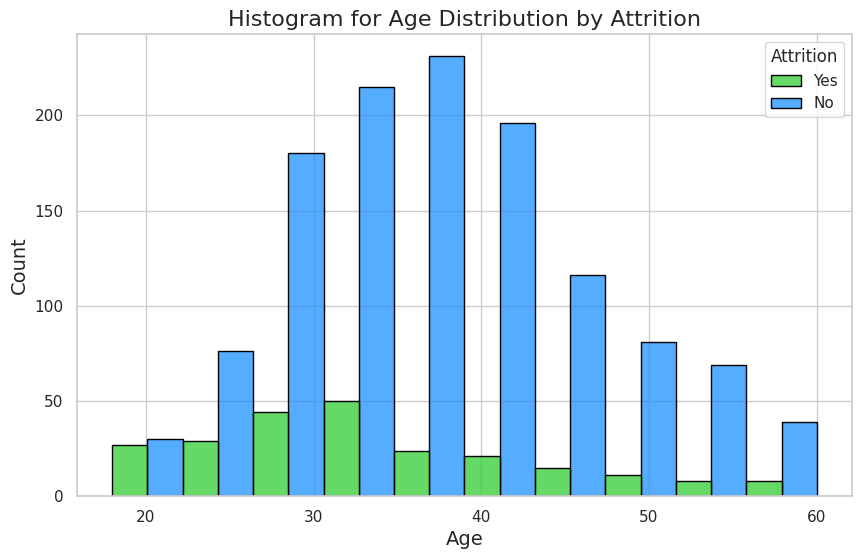

In [169]:
plt.hist(df0['Age'], bins=30, color='limegreen', edgecolor='black')
plt.title('Histogram for Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



# Create the histogram with hue for Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='Age', hue='Attrition', bins=10, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

# Add labels and title
plt.title('Histogram for Age Distribution by Attrition', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#HIGHEST ATTRITION 25-35 years
#MEIDAN AGE GROUP 30-40

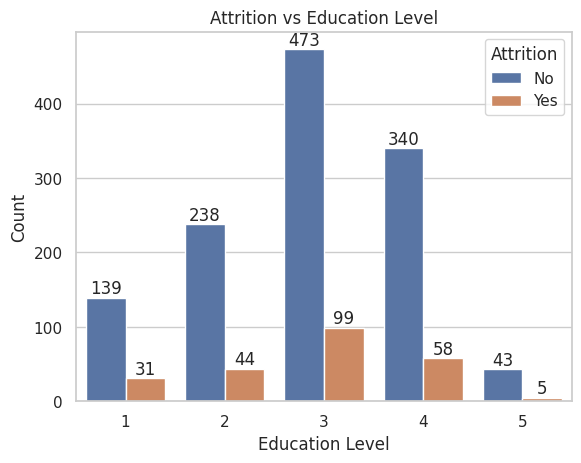

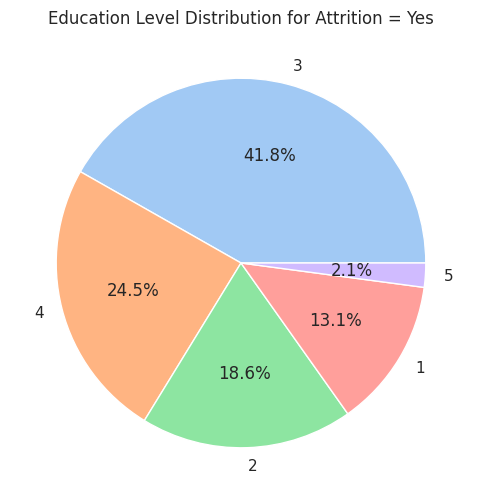

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.set(style="whitegrid")
ax = sns.countplot(x='Education', hue='Attrition', data=df0)

# Annotate the bars with the count values
for container in ax.containers:
    ax.bar_label(container)

# Add labels and title
plt.title('Attrition vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

df1 = df0[df0['Attrition'] == 'Yes']

education_counts = df1['Education'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Education Level Distribution for Attrition = Yes')
plt.show()

#EITHER DATA IS NOT RELEVANT
#OR 12TH STANDARD, GRADUATION AND POST GRADUATION ATTRITION ARE HIGH BECAUSE THEY APPEAR TO BE IN TRANSITIONAL OR RISK TAKING PHASE OF THEIR LIVES

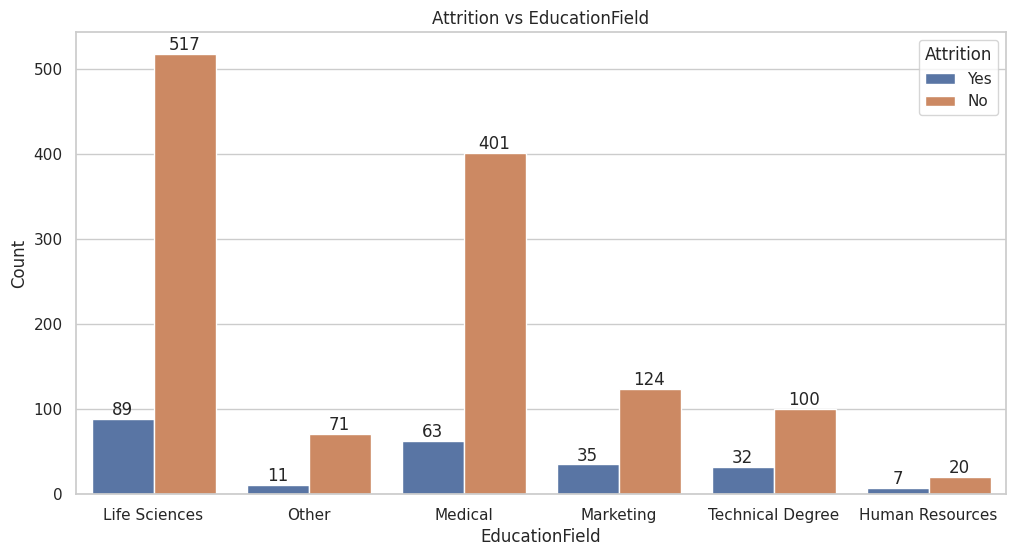

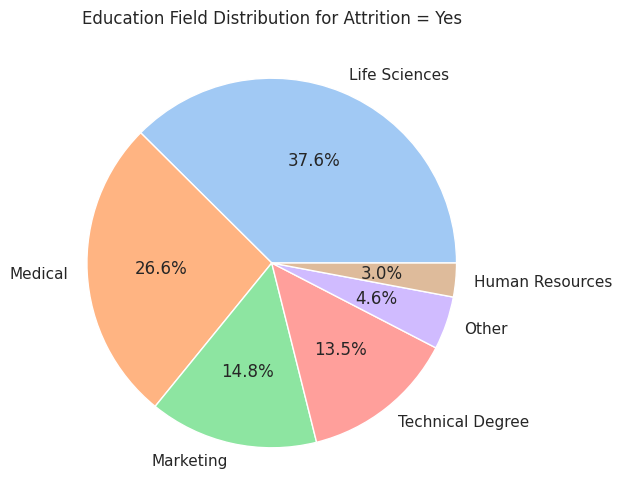

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Create the count plot
sns.set(style="whitegrid")
ax = sns.countplot(x='EducationField', hue='Attrition', data=df0)

# Annotate the bars with the count values
for container in ax.containers:
    ax.bar_label(container)

# Add labels and title
plt.title('Attrition vs EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.show()

education_counts = df1['EducationField'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Education Field Distribution for Attrition = Yes')
plt.show()

##COMPANY BELONGS TO HEALTH SECTOR

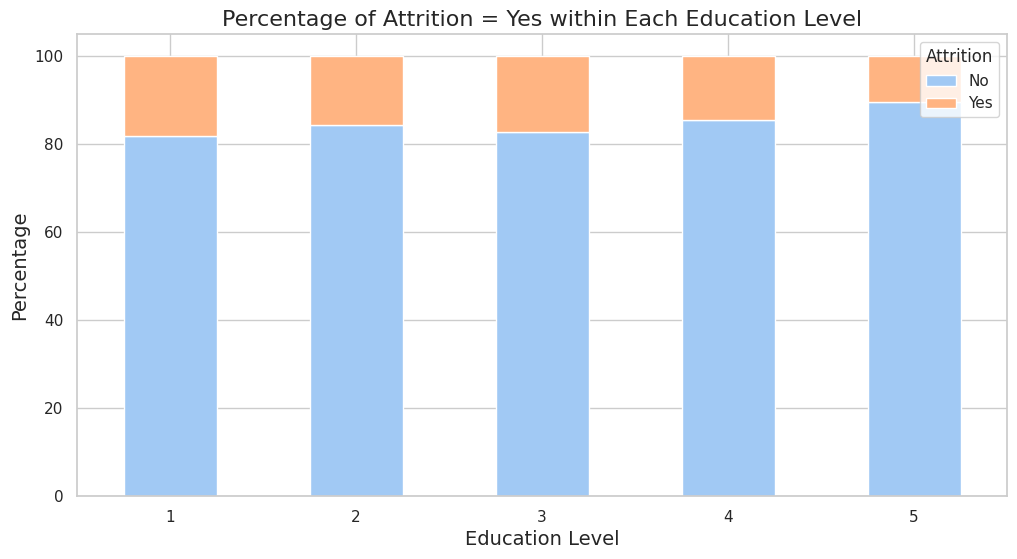

In [98]:
# Calculate the percentage of Attrition = Yes within each Education level
df_grouped = df0.groupby('Education')['Attrition'].value_counts(normalize=True).unstack()
df_grouped = df_grouped.fillna(0)  # Handle any missing values

df_grouped = df_grouped * 100
# Create a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('pastel', 2), figsize=(12, 6))

# Add labels and title
plt.title('Percentage of Attrition = Yes within Each Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## PERCENTAGE DROPOUT OF EACH EDUCATION LEVEL
## THIS DOESNT PROVIDE MUCH INSIGHT BECAUSE MORE OR LESS ATTRITION IS IN THE RATE OF 10-18% AND WE HAVE ONLY 1470 ENTRIES IN THIS DATASET
## RANKING
## 10TH =  DEGREE, = 12 = POST GRADUATE > DOC?POSTDOC 


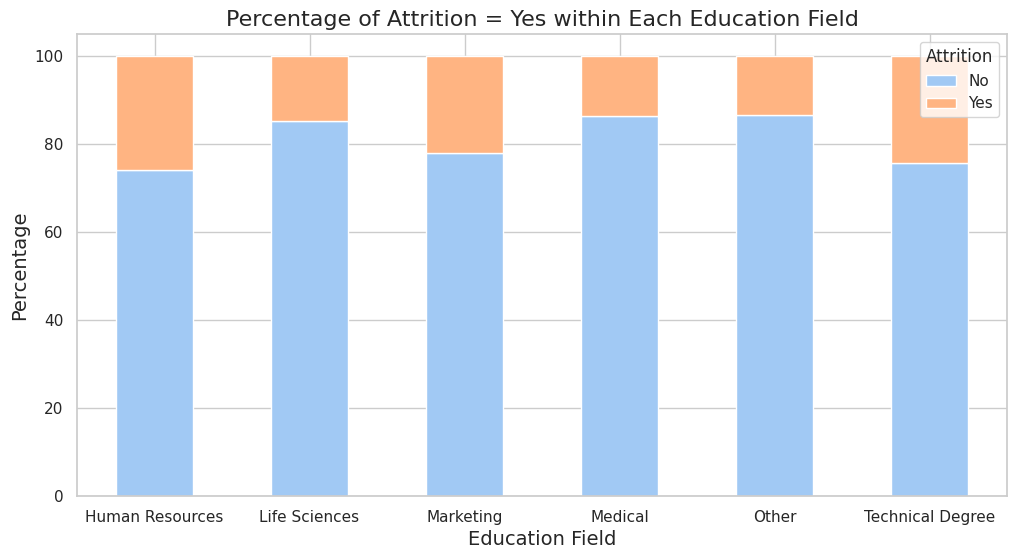

In [97]:
df_grouped = df0.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack()
df_grouped = df_grouped.fillna(0)  # Handle any missing values
df_grouped = df_grouped * 100

# Create a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('pastel', 2), figsize=(12, 6))

# Add labels and title
plt.title('Percentage of Attrition = Yes within Each Education Field', fontsize=16)
plt.xlabel('Education Field', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## THIS IS THE SAME PERCENTAGE RATIO IN EACH EDUCATIONAL BACKGROUND
## MEDICAL, LIFE SCIENCES, HAVE THE HIGHEST NUMBER OF EMPLOYEES AND LOWEST PERCENTAGE (BELOW 20) ATTRITION AMONG ALL.
## TECHNICAL DEGREE AND MARKETING HAVE HIGHER ATTRITION RATE AND NO> OF EMPLOYEES ARE ABOVE 220. THIS AREA IS TO BE FOCUSED. MAJOR CHANGES ARE RECOMMENDED HERE.
## ALTHOUGH PERCENTAGE IS HIGHEST IN HR. THE STRENGTH IS 27. MINOR CHANGES ARE NEEDED.

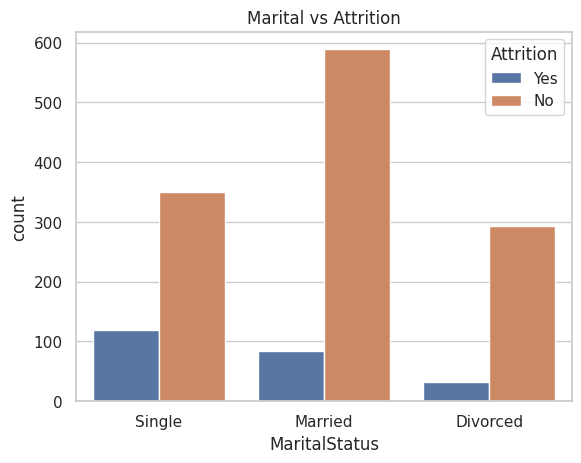

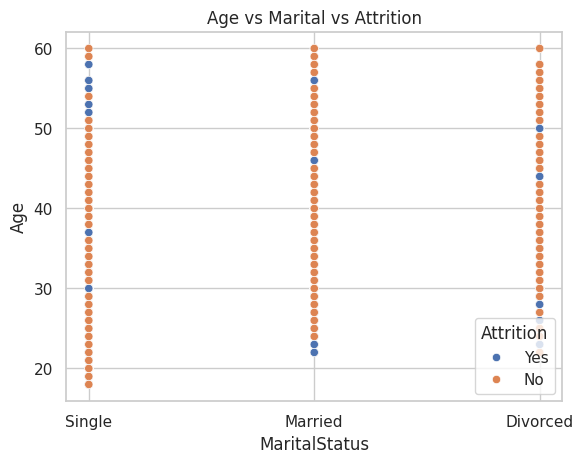

In [175]:

sns.countplot(x='MaritalStatus', hue='Attrition', data=df0)
plt.title('Marital vs Attrition')
plt.show()

sns.scatterplot(x='MaritalStatus', y = 'Age', hue='Attrition', data=df0)
plt.title('Age vs Marital vs Attrition')
plt.show()


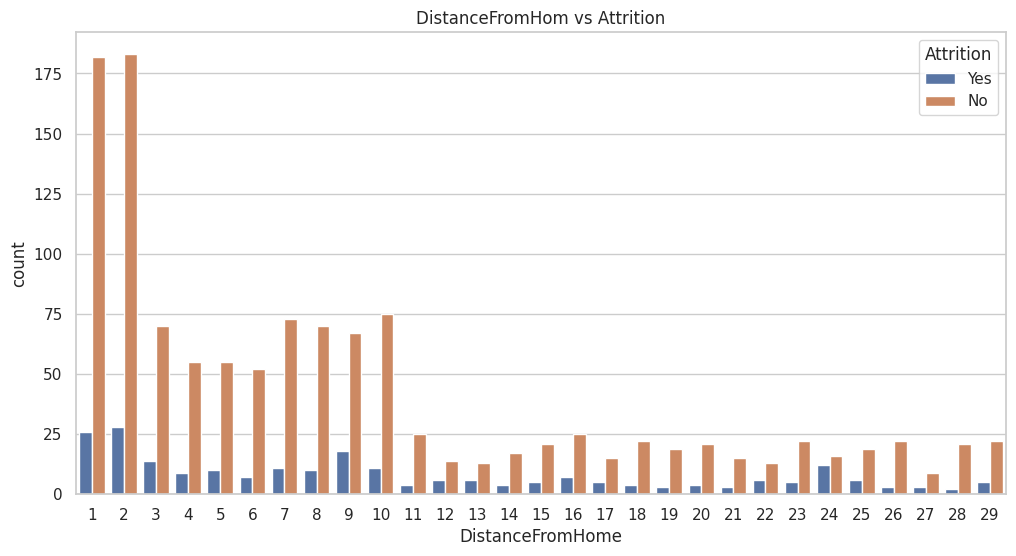

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df0)
plt.title('DistanceFromHom vs Attrition')
plt.show()

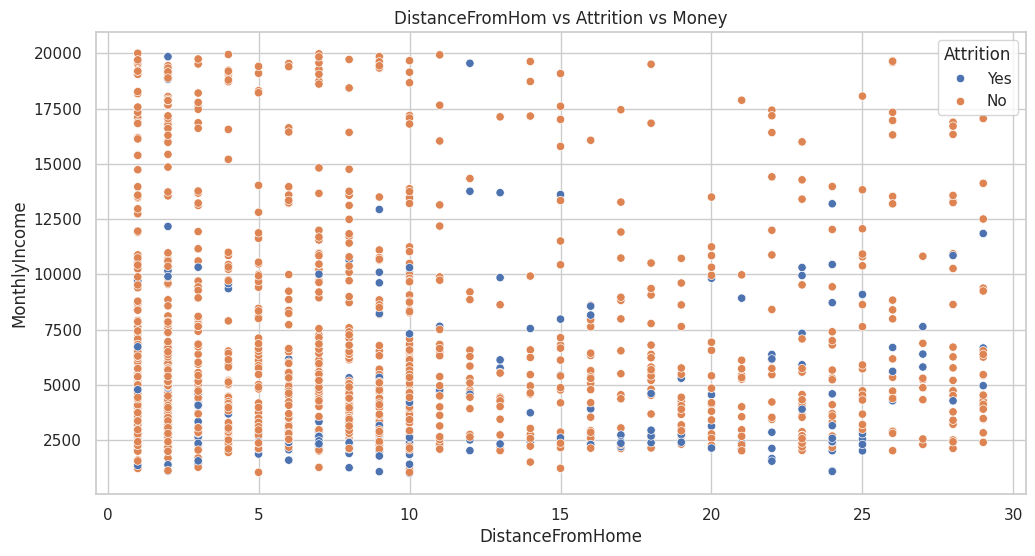

In [167]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=df0)
plt.title('DistanceFromHom vs Attrition vs Money')
plt.show()

In [126]:
df5 = df0[df0['DailyRate'] == 0]

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

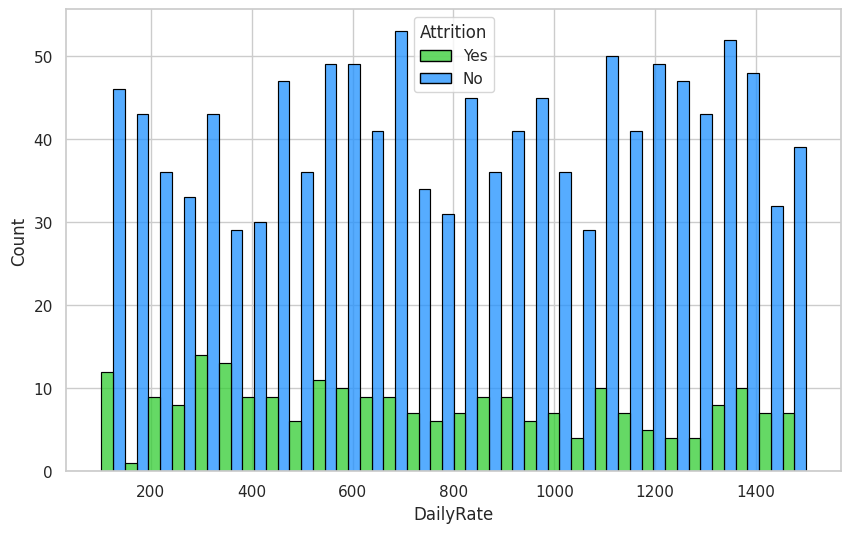

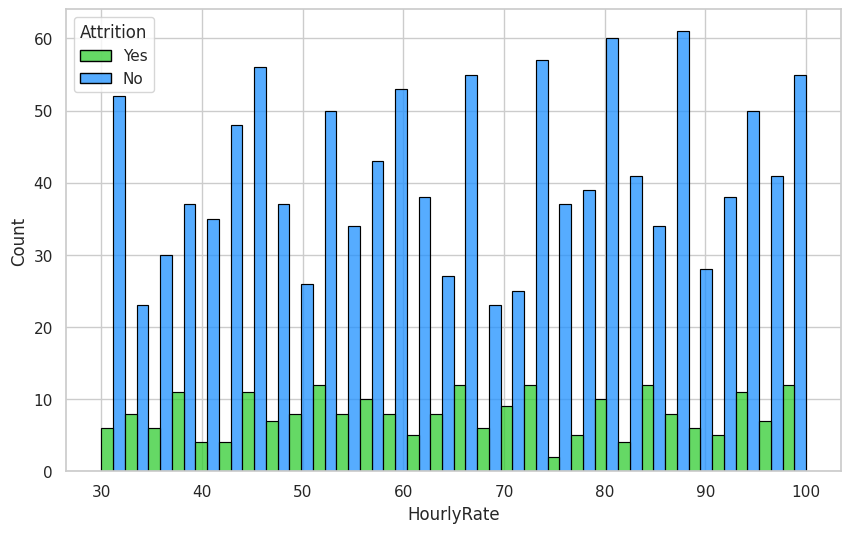

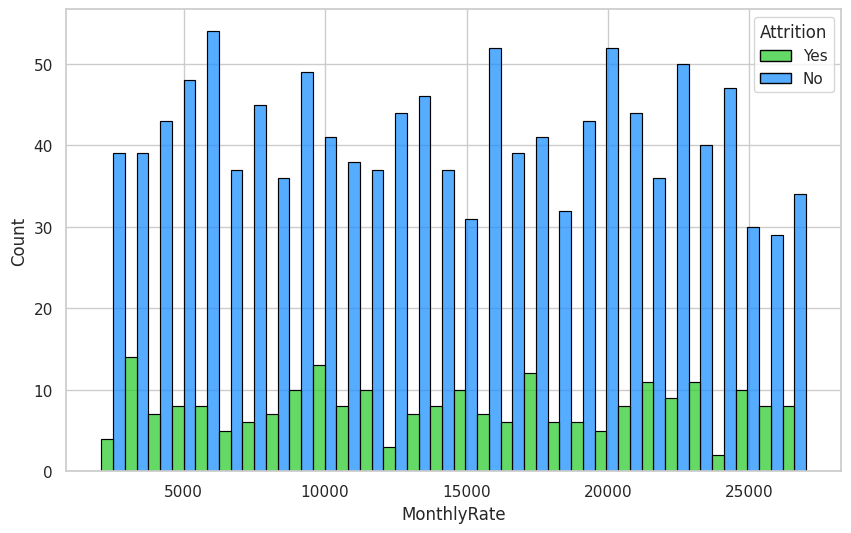

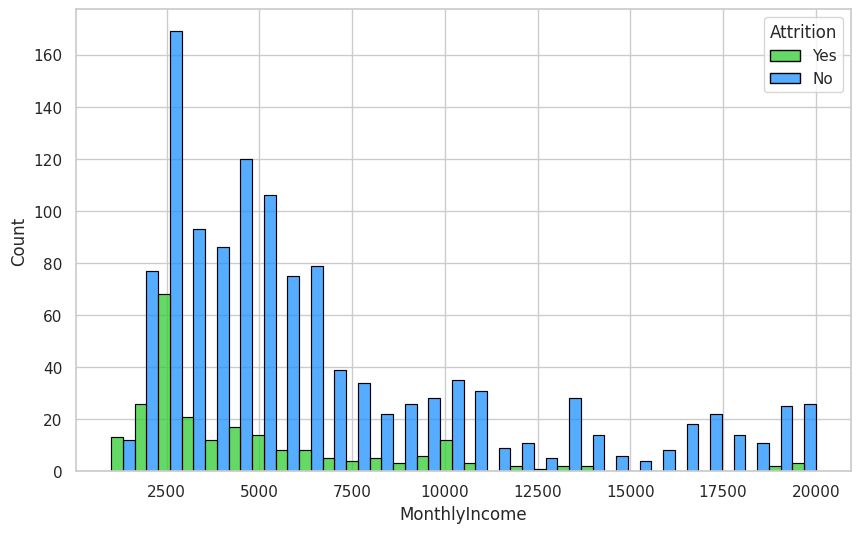

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='DailyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='HourlyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='MonthlyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='MonthlyIncome', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='MonthlyIncome', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

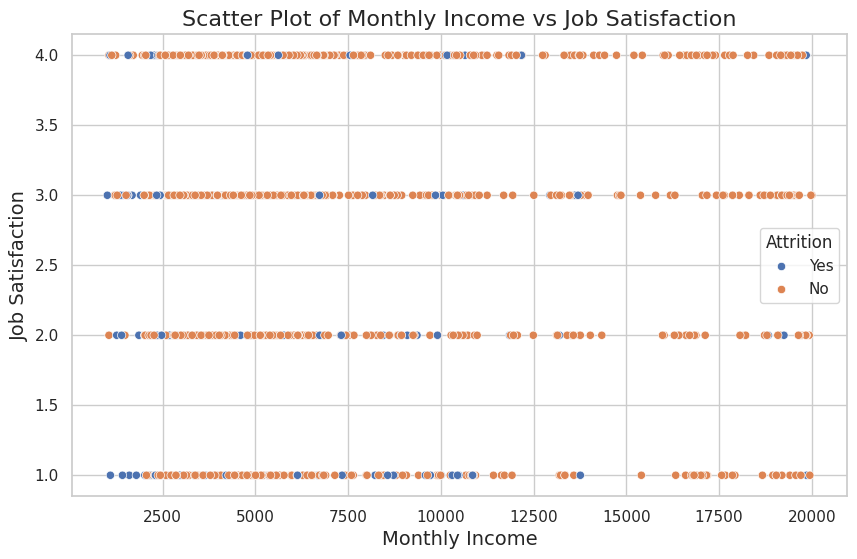

In [132]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='JobSatisfaction', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of Monthly Income vs Job Satisfaction', fontsize=16)
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.show()

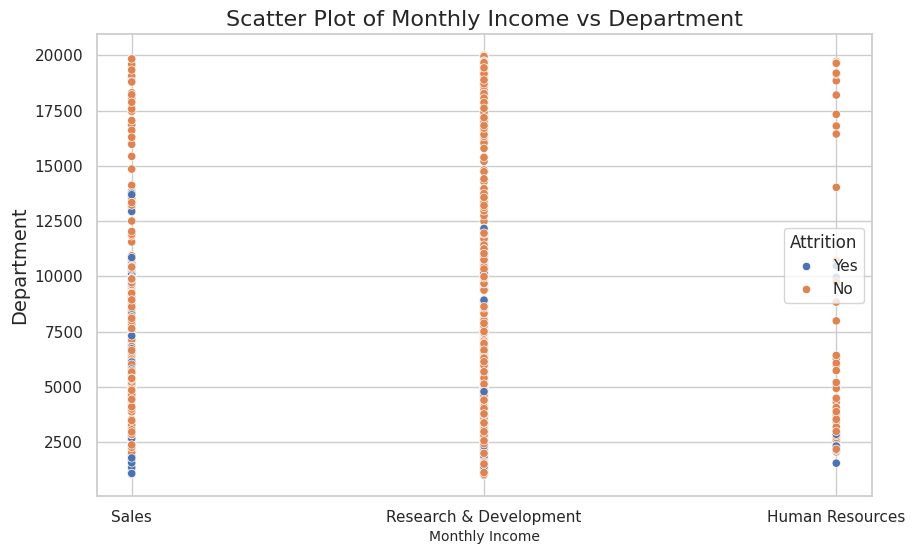

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of Monthly Income vs Department', fontsize=16)
plt.xlabel('Monthly Income', fontsize=10)
plt.ylabel('Department', fontsize=14)
plt.show()

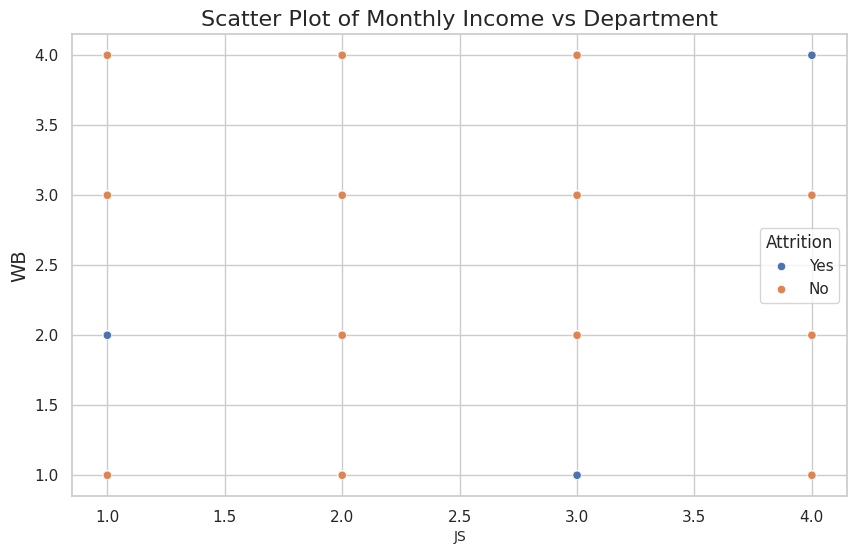

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatisfaction', y='WorkLifeBalance', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobSatisfaction vs WorkLifeBalance', fontsize=16)
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.show()

<AxesSubplot:xlabel='StandardHours', ylabel='Count'>

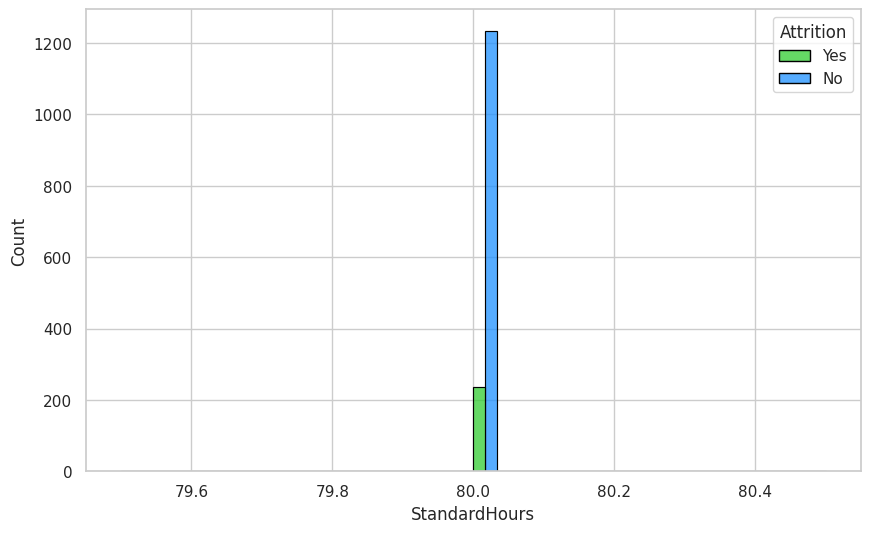

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='StandardHours', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')


<AxesSubplot:xlabel='OverTime', ylabel='Count'>

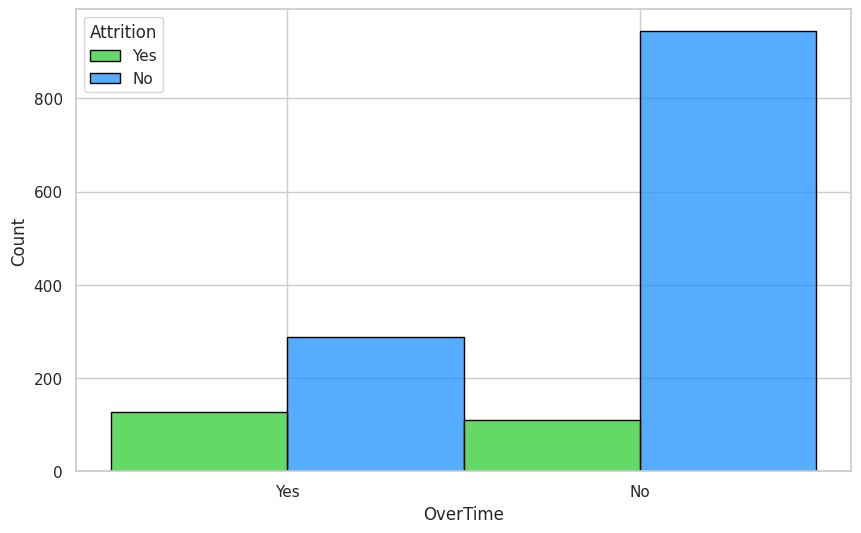

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='OverTime', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')


<AxesSubplot:xlabel='JobLevel', ylabel='Count'>

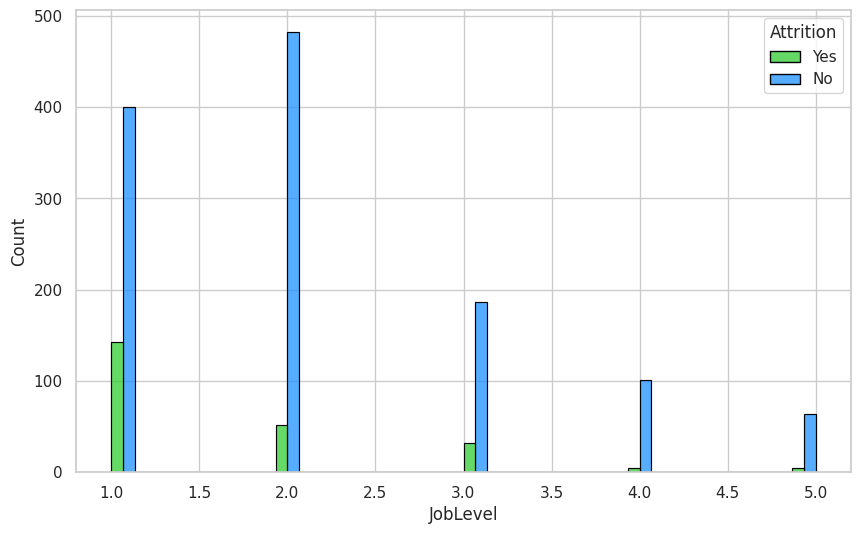

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='JobLevel', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

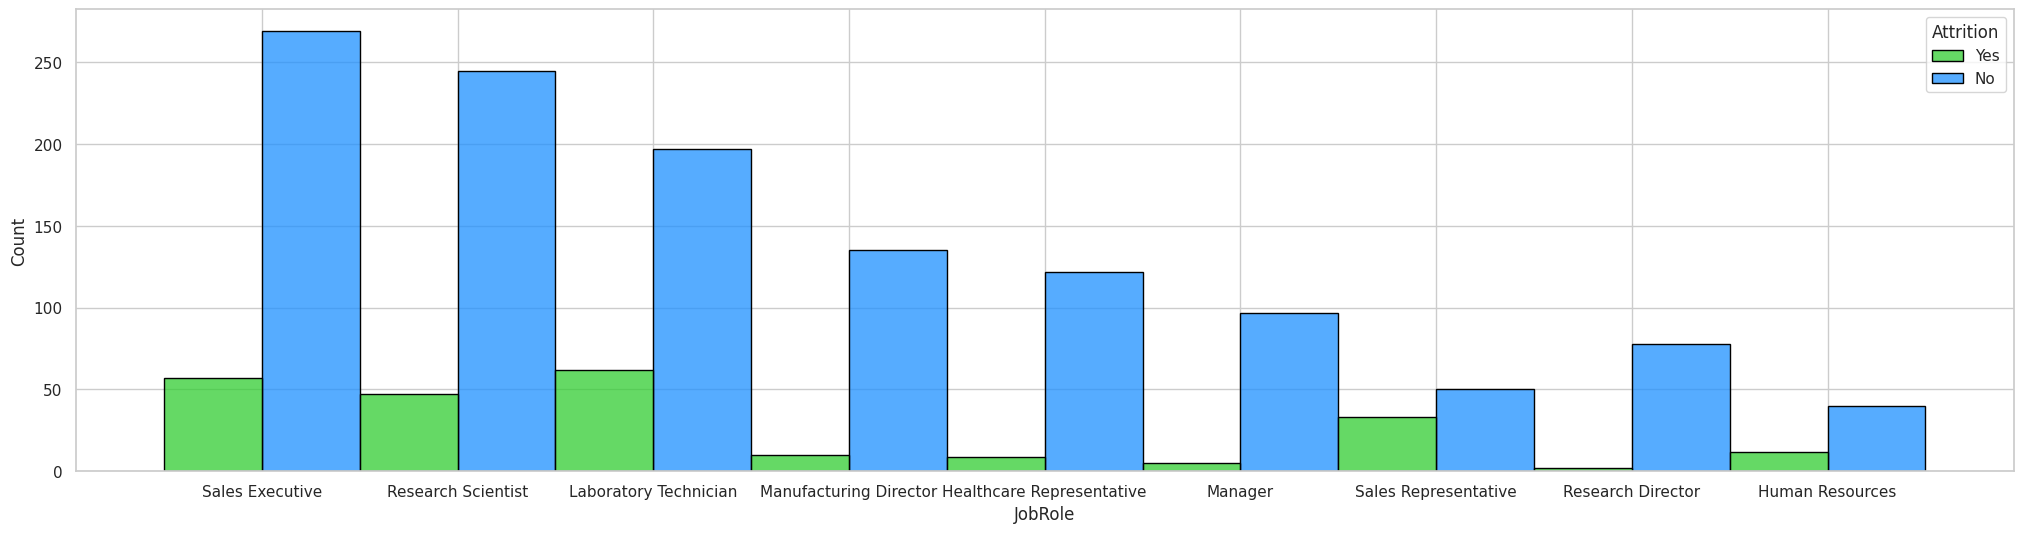

In [157]:
plt.figure(figsize=(25, 6))
sns.histplot(data=df0, x='JobRole', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

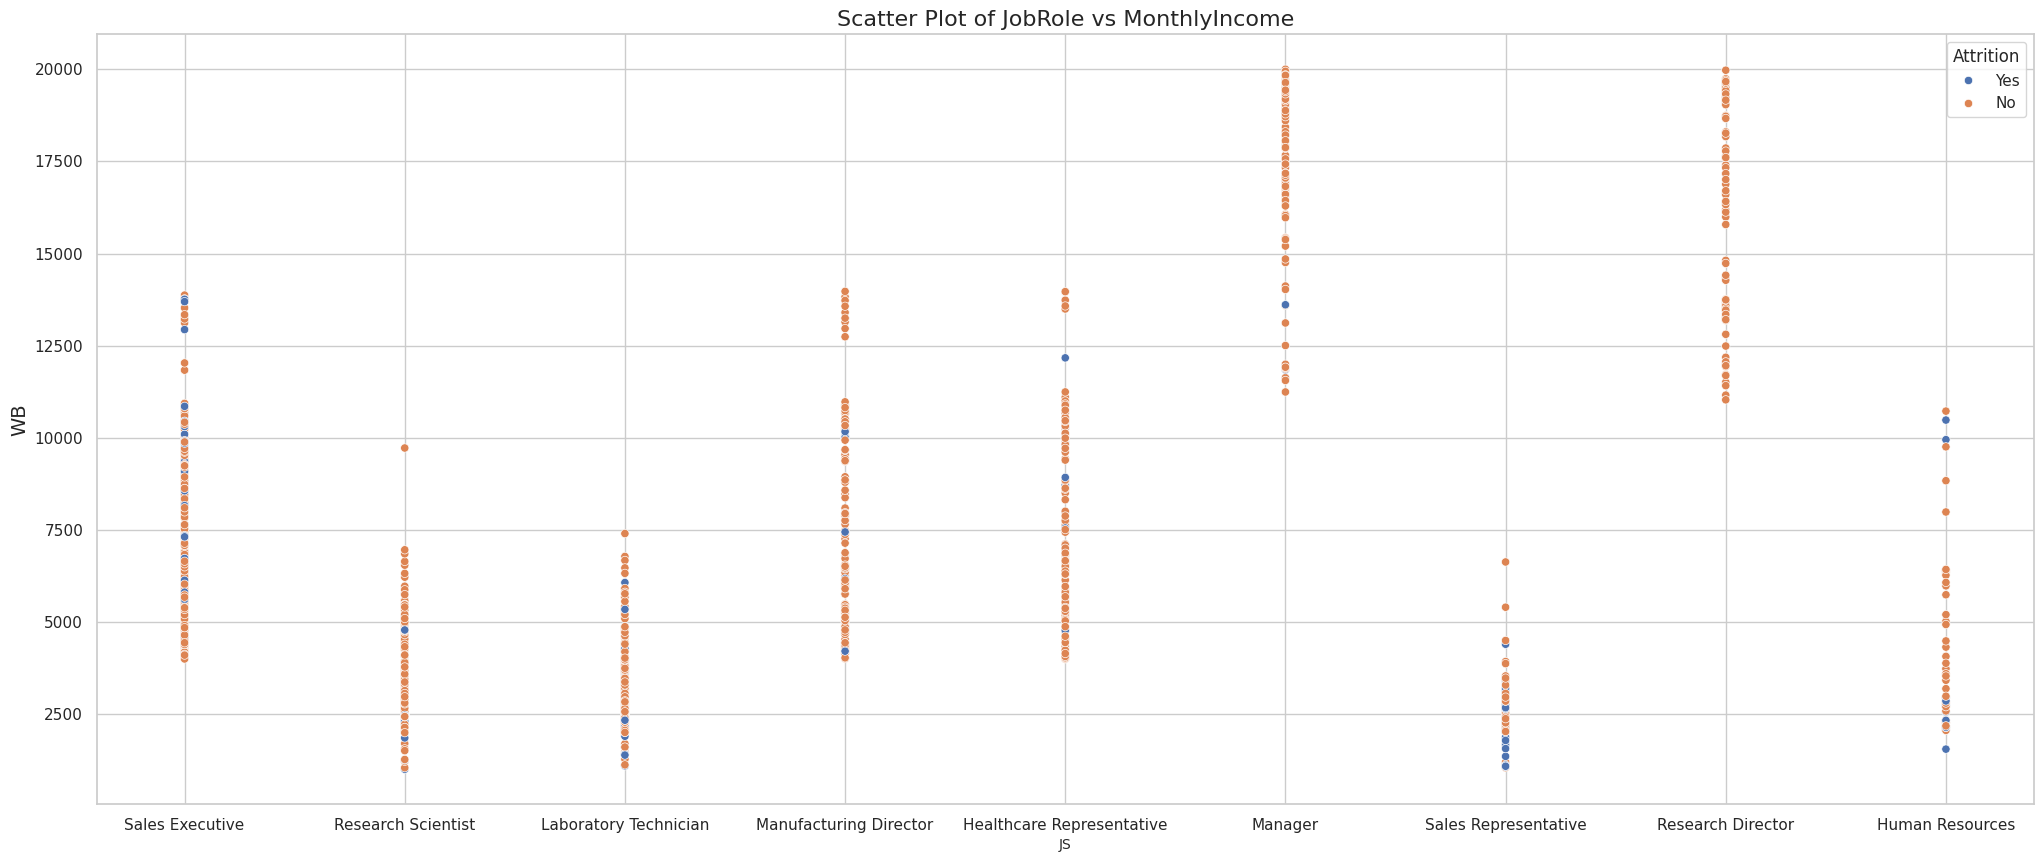

In [162]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobRole vs MonthlyIncome', fontsize=16)
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.show()

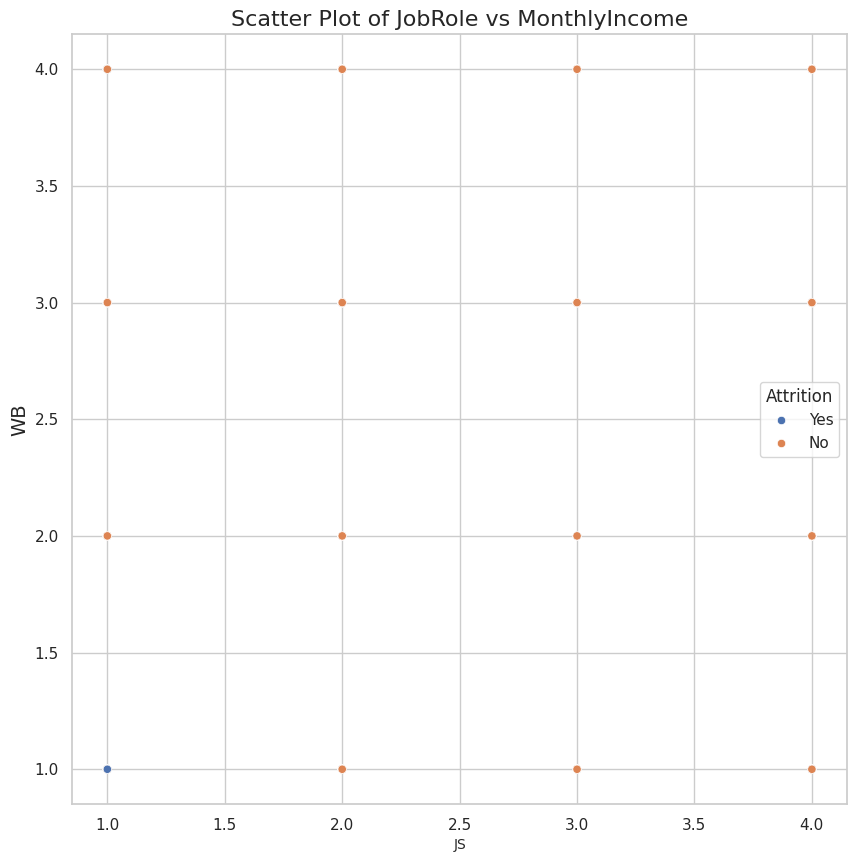

In [164]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='JobSatisfaction', y='EnvironmentSatisfaction', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobRole vs MonthlyIncome', fontsize=16)
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.show()